In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
df=pd.read_csv("../input/drug-classification/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
inputs = df.drop('Drug',axis='columns')
target = df['Drug']
inputs

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [4]:
inputs['Sex'] = inputs['Sex'].map({'M': 1, 'F': 2})
inputs.BP = inputs.BP.map({'LOW': 1, 'NORMAL': 2,'HIGH':3})
inputs.Cholesterol = inputs.Cholesterol.map({'LOW': 1, 'NORMAL': 2,'HIGH':3})

In [5]:
inputs.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,2,3,3,25.355
1,47,1,1,3,13.093
2,47,1,1,3,10.114
3,28,2,2,3,7.798
4,61,2,1,3,18.043


# test train split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [8]:
len(X_train)

160

In [9]:
len(X_test)

40

# decision tree

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_test,y_test)

1.0

# knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test,y_test)

0.675

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0,  0,  0],
       [ 0,  4,  0,  1,  2],
       [ 1,  0,  2,  0,  4],
       [ 0,  0,  1,  1,  2],
       [ 0,  2,  0,  0,  6]])

Text(42.0, 0.5, 'Truth')

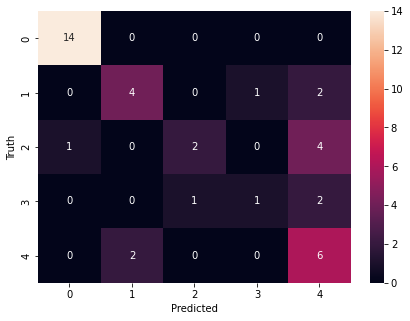

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')